In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155460 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 7.0 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=4bc43f465ffeb27d61f622c68906a977f878cad971085b302e6bdaeaa7cccaf2
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 10.8 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 14.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 16.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516277 sha256=52869a9dc3341c8cbc487ddba23d5689cb40ee694c0606bb0cf74c71de82b9d7
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [21]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential

In [5]:
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [6]:
from tensorflow import keras


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
!apt-get install tree
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (181 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
.
├── drive
│   └── MyDrive
│       ├── Brain_tumor_data_set
│       ├── Colab Notebooks
│       ├── data
│       ├── Mathematiques lecons brevet
│       │   ├── lessons en pdf
│       │   └── video lessons
│       ├── nature
│       │   ├── seg_test
│       │   │   └── seg_test


In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
!unzip /content/gdrive/MyDrive/Brain_tumor_data_set/brain_tumor_dataset.zip

Archive:  /content/gdrive/MyDrive/Brain_tumor_data_set/brain_tumor_dataset.zip
   creating: brain_tumor_dataset/
  inflating: __MACOSX/._brain_tumor_dataset  
  inflating: brain_tumor_dataset/.DS_Store  
  inflating: __MACOSX/brain_tumor_dataset/._.DS_Store  
   creating: brain_tumor_dataset/no/
  inflating: __MACOSX/brain_tumor_dataset/._no  
   creating: brain_tumor_dataset/yes/
  inflating: __MACOSX/brain_tumor_dataset/._yes  
  inflating: brain_tumor_dataset/no/30 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._30 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._22 no.jpg  
  inflating: brain_tumor_dataset/no/41 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._41 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._14 no.jpg  
  inflating: brain_tumor_dataset/no/no 10.jpg  
  inflating: __MACOSX/brain_tumor_dataset/no/._no 10.jpg  
  inflating: brain_tumor_datase

In [16]:
!unzip '/content/gdrive/MyDrive/Brain_tumor_data_set/brain_tumor_dataset.zip' -d '/content/gdrive/MyDrive/Colab Notebooks'

Archive:  /content/gdrive/MyDrive/Brain_tumor_data_set/brain_tumor_dataset.zip
   creating: /content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset/
  inflating: /content/gdrive/MyDrive/Colab Notebooks/__MACOSX/._brain_tumor_dataset  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset/.DS_Store  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/__MACOSX/brain_tumor_dataset/._.DS_Store  
   creating: /content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset/no/
  inflating: /content/gdrive/MyDrive/Colab Notebooks/__MACOSX/brain_tumor_dataset/._no  
   creating: /content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset/yes/
  inflating: /content/gdrive/MyDrive/Colab Notebooks/__MACOSX/brain_tumor_dataset/._yes  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/brain_tumor_dataset/no/30 no.jpg  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/__MACOSX/brain_tumor_dataset/no/._30 no.jpg  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/brain_

In [23]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

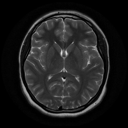

In [28]:
from PIL import Image
import os

im =Image.open('/content/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

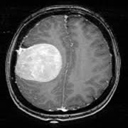

In [27]:
im =Image.open('/content/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [29]:
yes=os.listdir('/content/brain_tumor_dataset/yes')
no=os.listdir('/content/brain_tumor_dataset/no')


In [30]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [31]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [32]:
len(data_target)==len(data)


True

In [33]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
data

array(['Y184.JPG', 'Y51.jpg', 'Y92.jpg', 'Y25.jpg', 'Y100.JPG',
       'Y166.JPG', 'Y26.jpg', 'Y35.jpg', 'Y27.jpg', 'Y97.JPG', 'Y65.JPG',
       'Y163.JPG', 'Y69.jpg', 'Y7.jpg', 'Y255.JPG', 'Y256.JPG', 'Y86.JPG',
       'Y162.jpg', 'Y76.jpg', 'Y79.jpg', 'Y92.png', 'Y192.JPG', 'Y52.jpg',
       'Y182.JPG', 'Y158.JPG', 'Y251.JPG', 'Y243.JPG', 'Y45.JPG',
       'Y161.JPG', 'Y111.JPG', 'Y153.jpg', 'Y18.JPG', 'Y91.jpg',
       'Y254.jpg', 'Y32.jpg', 'Y242.JPG', 'Y258.JPG', 'Y67.JPG',
       'Y180.jpg', 'Y59.JPG', 'Y195.JPG', 'Y22.jpg', 'Y75.JPG',
       'Y102.jpg', 'Y183.jpg', 'Y160.JPG', 'Y245.jpg', 'Y159.JPG',
       'Y23.JPG', 'Y78.jpg', 'Y46.jpg', 'Y101.jpg', 'Y28.jpg', 'Y193.JPG',
       'Y90.jpg', 'Y246.JPG', 'Y41.jpg', 'Y164.JPG', 'Y3.jpg', 'Y30.jpg',
       'Y21.jpg', 'Y185.jpg', 'Y194.jpg', 'Y19.JPG', 'Y105.jpg',
       'Y155.JPG', 'Y11.jpg', 'Y181.jpg', 'Y49.JPG', 'Y47.JPG', 'Y31.jpg',
       'Y115.JPG', 'Y96.jpg', 'Y15.jpg', 'Y37.jpg', 'Y168.jpg', 'Y71.JPG',
       'Y13.jpg', 'Y5

In [35]:
yes_values=os.listdir('/content/brain_tumor_dataset/yes')
no_values=os.listdir('/content/brain_tumor_dataset/no')

In [36]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [37]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [38]:
X = np.squeeze(X_data)

In [39]:
X.shape

(253, 32, 32, 3)

In [40]:
# normalize data
X = X.astype('float32')
X /= 255

In [41]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])


In [44]:
import tensorflow as tf

In [45]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [46]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [47]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)


Epoch 1/150
2/2 [==============================] - 11s 370ms/step - loss: 0.6550 - acc: 0.4526 - val_loss: 1.5914 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 27ms/step - loss: 0.5324 - acc: 0.8158 - val_loss: 0.9789 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 29ms/step - loss: 0.4806 - acc: 0.8158 - val_loss: 0.9066 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 25ms/step - loss: 0.4826 - acc: 0.8158 - val_loss: 1.1029 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 25ms/step - loss: 0.4515 - acc: 0.8158 - val_loss: 1.2602 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 26ms/step - loss: 0.4666 - acc: 0.8158 - val_loss: 1.0758 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 25ms/step - loss: 0.4506 - acc: 0.8158 - val_loss: 1.0175 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 25ms/s

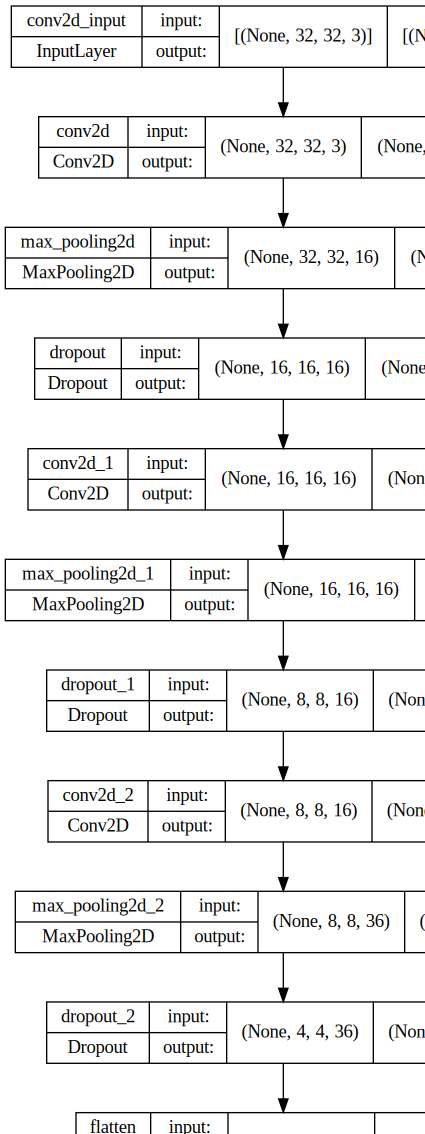

In [48]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [49]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6666666865348816


In [50]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

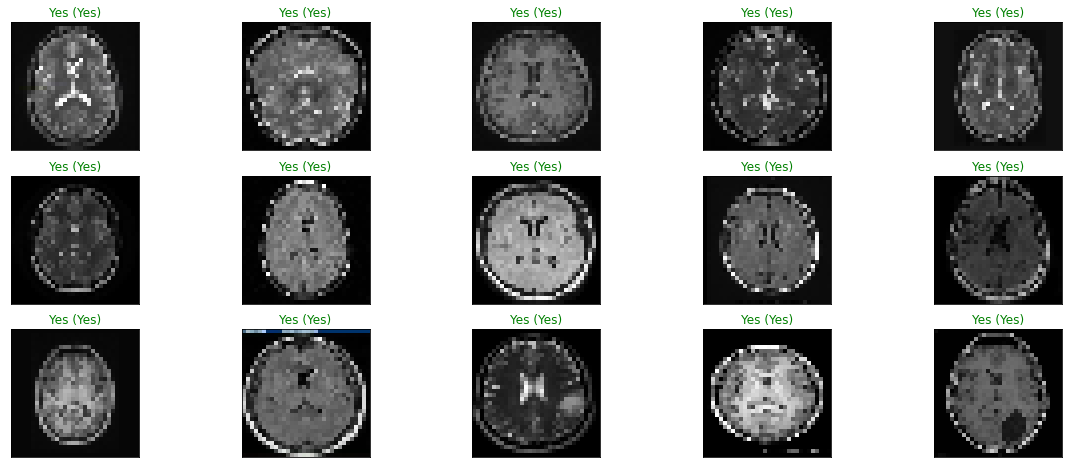

In [51]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()